# Get a LSST Simulated Cadence for Arbitrary Sky Position
___


___

In [1]:
"""

"""
%matplotlib inline

from __future__ import print_function

try:
    from importlib import reload
except:
    pass


from matplotlib import pyplot as plt
import matplotlib.colors as mpl_colors 

import os
import sys
import warnings

import numpy as np
import pandas as pd
import astropy as ap
import sfdmap

import sqlite3
from sqlalchemy import create_engine

from astropy import units as u
from astropy.coordinates import SkyCoord

import lsst_tools.utils as utils 
import lsst_tools.utils.colours as colours 

import pyCoCo as pccsims

if sys.version_info < (3,):
    def b(x):
        return x
else:
    import codecs
    def b(x):
        return codecs.latin_1_encode(x)[0]

import pycoco as pcc
from astropy.table import Table

In [2]:
def simulate_out_to_ap_table(mjd_to_sim, flux, dflux, filters_to_sim, 
                             names = ('MJD', 'flux', 'flux_err', 'filter')):
    return Table([mjd_to_sim, flux, dflux, filters_to_sim.astype(str)], names = names)

In [3]:
# pccsims.__file__

Connect to .db file that contains the opsim output, read into a dataframe, `opsimdf`

In [4]:
# %%timeit ## 1 loop, best of 3: 1min 31s per loop 
# opsimdbpath = os.environ.get('OPSIMDBPATH')
# print(opsimdbpath)
opsimdbpath = "/Users/berto/data/LSST/OpSimOutputDBs/astro_lsst_01_1068_sqlite.db"
# opsimdbpath = "/Users/berto/data/LSST/OpSimOutputDBs/minion_1016_sqlite.db"

conn = create_engine('sqlite:///'+opsimdbpath, echo = False)
opsimdf = pd.read_sql_table('Summary', con=conn)

In [42]:
opsimdf

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,EBV_MW
0,1,1068,227,505,1.720374,-0.936476,y,2922,59580.033829,0,...,105.043185,0.920473,0.0,0.0,1.659226,0.000000,21.013506,1.694604,-0.962927,0.073125
1,2,1068,227,567,1.648235,-0.903353,y,2961,59580.034278,0,...,101.373243,0.920473,0.0,0.0,0.054827,4.769109,21.058304,1.623562,-0.929804,0.058539
2,3,1068,227,561,1.563788,-0.915583,y,3000,59580.034726,0,...,98.042992,0.920473,0.0,0.0,0.053275,4.780469,21.099047,1.538724,-0.942034,0.052462
3,4,1068,227,539,1.477422,-0.924531,y,3039,59580.035175,0,...,95.139389,0.920473,0.0,0.0,0.053066,4.762092,21.134714,1.452062,-0.950982,0.044044
4,5,1068,227,531,1.389669,-0.930365,y,3077,59580.035623,0,...,92.619319,0.920473,0.0,0.0,0.052952,4.739055,21.165823,1.364111,-0.956816,0.018511
5,6,1068,227,517,1.301075,-0.933239,y,3116,59580.036071,0,...,90.448151,0.920473,0.0,0.0,0.052904,4.709074,21.192773,1.275418,-0.959690,0.007716
6,7,1068,227,519,1.212198,-0.933238,y,3155,59580.036519,0,...,88.596990,0.920473,0.0,0.0,0.052892,4.669665,21.215880,1.186541,-0.959689,0.003877
7,8,1068,227,523,1.123604,-0.930366,y,3193,59580.036967,0,...,87.040118,0.920473,0.0,0.0,0.052904,4.742319,21.235417,1.098046,-0.956817,0.007656
8,9,1068,227,541,1.035849,-0.924530,y,3233,59580.037422,0,...,85.753276,0.920473,0.0,0.0,0.052953,5.250509,21.251646,1.010489,-0.950981,0.013879
9,10,1068,227,698,0.988892,-0.827713,y,3272,59580.037880,0,...,83.013952,0.920473,0.0,0.0,0.101357,5.588682,21.286460,0.966319,-0.854164,0.006749


In [59]:
#%%timeit ## The slowest run took 39.04 times longer than the fastest. This could mean that an intermediate result is being cached.
#         ## 1000 loops, best of 3: 246 µs per loop
n = 1
pos_df = utils.generate_coordinates(n)
print(pos_df)
# pos_df["phi"] = -0.122
# pos_df["theta"] = 0.0

        phi     theta
0 -0.605059  2.718565


Add extinction to the dataframe

In [44]:
#%%timeit ## 1 loop, best of 3: 88.6 ms per loop
df = utils.find_MW_extinction(pos_df) 

Check the positions are sensible

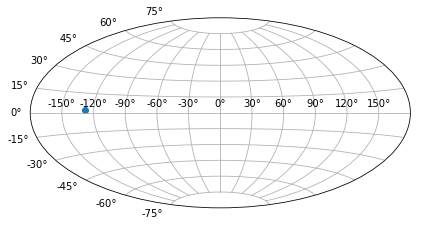

In [45]:
#%%timeit ## 1 loop, best of 3: 235 ms per loop
utils.plot_position_points(df)

Connecting to `.db` takes ages (~1min), and is a pain if you mess up, so create a 'working' instance to fiddle with

In [46]:
working_df = opsimdf

## Identifying Fields
___
We want to find out which field(s) the position is in. Create table that tells us the field centres, and find the edges.

In [49]:
# working_df = utils.get_field_corners(working_df.drop_duplicates("fieldID"))[['fieldRA', 'fieldDec']]
allfields_df = utils.get_field_corners(pd.DataFrame(working_df.drop_duplicates("fieldID"))[['fieldID', 'fieldRA', 'fieldDec']])

In [50]:
allfields_df

,fieldID,fieldRA,fieldDec,RA_upper,RA_lower,Dec_upper,Dec_lower
0,505,1.720374,-0.936476,1.750917,1.689831,-0.967019,-0.905933
1,567,1.648235,-0.903353,1.678778,1.617692,-0.933896,-0.872810
2,561,1.563788,-0.915583,1.594331,1.533245,-0.946126,-0.885040
3,539,1.477422,-0.924531,1.507965,1.446879,-0.955074,-0.893988
4,531,1.389669,-0.930365,1.420212,1.359126,-0.960908,-0.899822
5,517,1.301075,-0.933239,1.331618,1.270532,-0.963782,-0.902696
6,519,1.212198,-0.933238,1.242741,1.181655,-0.963781,-0.902695
7,523,1.123604,-0.930366,1.154147,1.093061,-0.960909,-0.899823
8,541,1.035849,-0.924530,1.066392,1.005306,-0.955073,-0.893987
9,698,0.988892,-0.827713,1.019435,0.958349,-0.858256,-0.797170


In [51]:
field_df = allfields_df[(allfields_df["RA_upper"] >= df["theta"][0] + np.pi) &
                (allfields_df["RA_lower"] <= df["theta"][0] + np.pi) &
                (allfields_df["Dec_lower"] >= df["phi"][0])  &
                (allfields_df["Dec_upper"] <= df["phi"][0])]

In [52]:
field_df

,fieldID,fieldRA,fieldDec,RA_upper,RA_lower,Dec_upper,Dec_lower
182426,2714,0.901111,0.025554,0.931654,0.870568,-0.004989,0.056097


In [53]:
# field_df[field_df["fieldID"] == 2846]
working_df = utils.find_MW_extinction(working_df)
# field_df = opsimdf.loc[opsimdf["fieldID"] == chosenfield].head(1)

In [54]:
working_df

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,EBV_MW
0,1,1068,227,505,1.720374,-0.936476,y,2922,59580.033829,0,...,105.043185,0.920473,0.0,0.0,1.659226,0.000000,21.013506,1.694604,-0.962927,0.073125
1,2,1068,227,567,1.648235,-0.903353,y,2961,59580.034278,0,...,101.373243,0.920473,0.0,0.0,0.054827,4.769109,21.058304,1.623562,-0.929804,0.058539
2,3,1068,227,561,1.563788,-0.915583,y,3000,59580.034726,0,...,98.042992,0.920473,0.0,0.0,0.053275,4.780469,21.099047,1.538724,-0.942034,0.052462
3,4,1068,227,539,1.477422,-0.924531,y,3039,59580.035175,0,...,95.139389,0.920473,0.0,0.0,0.053066,4.762092,21.134714,1.452062,-0.950982,0.044044
4,5,1068,227,531,1.389669,-0.930365,y,3077,59580.035623,0,...,92.619319,0.920473,0.0,0.0,0.052952,4.739055,21.165823,1.364111,-0.956816,0.018511
5,6,1068,227,517,1.301075,-0.933239,y,3116,59580.036071,0,...,90.448151,0.920473,0.0,0.0,0.052904,4.709074,21.192773,1.275418,-0.959690,0.007716
6,7,1068,227,519,1.212198,-0.933238,y,3155,59580.036519,0,...,88.596990,0.920473,0.0,0.0,0.052892,4.669665,21.215880,1.186541,-0.959689,0.003877
7,8,1068,227,523,1.123604,-0.930366,y,3193,59580.036967,0,...,87.040118,0.920473,0.0,0.0,0.052904,4.742319,21.235417,1.098046,-0.956817,0.007656
8,9,1068,227,541,1.035849,-0.924530,y,3233,59580.037422,0,...,85.753276,0.920473,0.0,0.0,0.052953,5.250509,21.251646,1.010489,-0.950981,0.013879
9,10,1068,227,698,0.988892,-0.827713,y,3272,59580.037880,0,...,83.013952,0.920473,0.0,0.0,0.101357,5.588682,21.286460,0.966319,-0.854164,0.006749


## Deep Drilling Fields:
___

* minion2016: 1427,744,2412,290,2786
* astro_lsst_01_1068: 1427,744,2412,290,2786
* Fake_Rolling: 290,2786


In [55]:
working_df.loc[working_df["fieldID"] == 505] ## WFD

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,EBV_MW
0,1,1068,227,505,1.720374,-0.936476,y,2922,59580.033829,0,...,105.043185,0.920473,0.0,0.0,1.659226,0.000000,21.013506,1.694604,-0.962927,0.073125
723,724,1068,227,505,1.720374,-0.936476,z,89448,59581.035286,1,...,103.857980,0.866146,0.0,0.0,0.049266,4.630018,21.563110,1.701047,-0.962927,0.073125
1426,1427,1068,227,505,1.720374,-0.936476,z,116828,59581.352187,1,...,107.507626,0.745946,0.0,0.0,0.054635,4.654791,21.648363,1.701047,-0.962927,0.073125
4377,4378,1068,227,505,1.720374,-0.936476,z,523087,59586.054253,6,...,95.991308,0.804393,0.0,0.0,0.053899,4.651421,21.704848,1.733259,-0.962927,0.073125
13841,13841,1068,227,505,1.720374,-0.936476,y,1644453,59599.033030,19,...,93.300813,0.804711,0.0,0.0,0.054175,4.617210,21.268988,1.688162,-0.956314,0.073125
14639,14639,1068,227,505,1.720374,-0.936476,y,1731724,59600.043113,20,...,91.234560,0.595623,0.0,0.0,0.054827,4.891074,21.515723,1.694604,-0.956314,0.073125
15398,15398,1068,227,505,1.720374,-0.936476,y,1817471,59601.035552,21,...,91.976359,0.600844,0.0,0.0,0.053899,4.816345,21.500725,1.701047,-0.956314,0.073125
15720,15720,1068,227,505,1.720374,-0.936476,i,1830780,59601.189588,21,...,87.021804,0.559097,0.0,0.0,0.053899,4.753368,23.315915,1.701047,-0.956314,0.073125
15764,15764,1068,227,505,1.720374,-0.936476,i,1832559,59601.210174,21,...,89.151847,0.630182,0.0,0.0,0.053899,4.828981,23.176625,1.701047,-0.956314,0.073125
16239,16239,1068,227,505,1.720374,-0.936476,g,1908141,59602.084973,22,...,86.149963,0.910874,0.0,0.0,0.109853,6.222638,24.211174,1.707489,-0.956314,0.073125


In [56]:
working_df.loc[working_df["fieldID"] == 1427] ## DDF

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,EBV_MW
228,229,1068,248,1427,0.925184,-0.4789,r,12021,59580.139144,0,...,84.581506,0.866285,0.0,0.0,0.665408,140.0,24.020509,0.907976,-0.505351,0.007715
229,230,1068,248,1427,0.925184,-0.4789,r,12057,59580.139560,0,...,84.902366,0.791241,0.0,0.0,0.000000,2.0,24.093428,0.907976,-0.505351,0.007715
230,231,1068,248,1427,0.925184,-0.4789,r,12093,59580.139977,0,...,84.970046,0.791241,0.0,0.0,0.000000,2.0,24.092267,0.907976,-0.505351,0.007715
231,232,1068,248,1427,0.925184,-0.4789,r,12129,59580.140394,0,...,85.038172,0.791241,0.0,0.0,0.000000,2.0,24.091099,0.907976,-0.505351,0.007715
232,233,1068,248,1427,0.925184,-0.4789,r,12165,59580.140810,0,...,85.106747,0.859965,0.0,0.0,0.000000,2.0,24.017937,0.907976,-0.505351,0.007715
233,234,1068,248,1427,0.925184,-0.4789,r,12201,59580.141227,0,...,85.175771,0.859965,0.0,0.0,0.000000,2.0,24.016755,0.907976,-0.505351,0.007715
234,235,1068,248,1427,0.925184,-0.4789,r,12237,59580.141644,0,...,85.245246,0.859965,0.0,0.0,0.000000,2.0,24.015564,0.907976,-0.505351,0.007715
235,236,1068,248,1427,0.925184,-0.4789,r,12273,59580.142060,0,...,85.315173,0.859965,0.0,0.0,0.000000,2.0,24.014368,0.907976,-0.505351,0.007715
236,237,1068,248,1427,0.925184,-0.4789,r,12309,59580.142477,0,...,85.385554,0.859965,0.0,0.0,0.000000,2.0,24.013163,0.907976,-0.505351,0.007715
237,238,1068,248,1427,0.925184,-0.4789,r,12345,59580.142894,0,...,85.456390,0.859965,0.0,0.0,0.000000,2.0,24.011952,0.907976,-0.505351,0.007715


In [57]:
# # mjdmax = np.random.choice(mjd_to_sim)
# # mjdmax = np.random.choice(mjd_to_sim)
# # 
# # chosenfield = 550 ## WFD
# chosenfield = 2297
# # chosenfield = 2786 ## DDF

# mjd_to_sim = opsimdf.loc[opsimdf["fieldID"] == chosenfield,["expMJD"]].values.T[0]
# filters_to_sim = opsimdf.loc[opsimdf["fieldID"] == chosenfield,["filter"]].values.T[0]
# limiting_mags = opsimdf.loc[opsimdf["fieldID"] == chosenfield,["fiveSigmaDepth"]].values.T[0] 

# filters_to_sim = np.array([b('LSST_'+x) for x in filters_to_sim])

# Epochs for Simulation
___

In [58]:
mjd_to_sim = working_df["expMJD"][working_df["fieldID"].isin(working_df["fieldID"].values)].values
filters_to_sim = working_df["filter"][working_df["fieldID"].isin(working_df["fieldID"].values)].values
limiting_mags = working_df["fiveSigmaDepth"][working_df["fieldID"].isin(working_df["fieldID"].values)].values

## Extinction

Get the Milky Way extinction along the line of site towards the SNe

In [64]:
extinction = utils.find_MW_extinction(pos_df)["EBV_MW"].values[0]
print(extinction)

0.122651721609


In [ ]:
# extinction = opsimdf.loc[opsimdf["fieldID"] == chosenfield,["EBV_MW"]].head(1).values[0][0]
# print(extinction)

In [66]:
# print(opsimdf.loc[opsimdf["fieldID"] == chosenfield,["fieldRA"]].head(1).values[0][0])
# print(opsimdf.loc[opsimdf["fieldID"] == chosenfield,["fieldDec"]].head(1).values[0][0])


In [67]:
# pcc._default_coco_dir_path

'/Users/berto/Code/CoCo/data/filters'

In [ ]:
# filter_path = "/Users/berto/Code/CoCo/data/filters"
filter_path = pcc._default_filter_dir_path
# coco_root_path = "/Users/berto/Code/CoCo"
coco_root_path = pcc._default_coco_dir_path 

coco = pccsims.pyCoCo(b(filter_path), b(coco_root_path))

In [ ]:
# mjd_to_sim = np.array([90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 105.0, 110.0, 115.0, 120.0])
# filters_to_sim = np.array([b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r', b'SDSS_r'])
# mjd_to_sim = 
# filters_to_sim = 

inputs:

* **`snname`**
* **`redshift`**
* **`absmag offset`**
* **`EBV MW`**
* **`EBV Host`**
* **`Rv`**
* **`MJD at Peak`**

* **`MJD to simulate`**
* **`filters to simulate`**

In [ ]:
# z_obs = 0.007
# z_obs = 0.1
z_obs = 0.2
host_EBV = 0.2
MW_EBV = extinction
# mjdmax = 60307.314753999999
# mjdmax = 59580 + 1.* 365. ## DDF 2786
# mjdmax = 59580 + 1.5* 365. ## WFD 550
mjdmax = 59580 + 1.3* 365. ## WFD 2297

In [ ]:
plt.scatter(mjd_to_sim, np.ones(len(mjd_to_sim)))
plt.scatter([mjdmax], [1])

In [ ]:
# flux, flux_err = coco.simulate(b"SN2007uy", 
#                     z_obs, 0.0, MW_EBV, host_EBV, 3.1, 
#                     mjdmax, mjd_to_sim, 
#                     filters_to_sim)
snname = b"SN2007uy"
# snname = b"SN2009jf"
flux, flux_err = coco.simulate(snname, 
                    z_obs, 0.0, MW_EBV, host_EBV, 3.1, 
                    mjdmax, mjd_to_sim, 
                    filters_to_sim)
# flux, flux_err = coco.simulate(b"SN2009jf", 
#                     z_obs, 0.0, 0.1, 0.1, 3.1, 
#                     mjdmax, mjd_to_sim, 
#                     filters_to_sim)

In [ ]:
flux, flux_err

In [ ]:
mjdmax 

In [ ]:
p = pcc.PhotometryClass()
pt = simulate_out_to_ap_table(mjd_to_sim, flux, flux_err, filters_to_sim)
pt_lim_m = pt
pt_lim_m["fivesigmadepth"] = limiting_mags

In [ ]:
pt = pt_lim_m[np.where(pt_lim_m["flux"] > 1e-22)]

In [ ]:
pt

In [ ]:
days_before = 40
days_after = 100
print(mjdmax)
w = np.where(np.logical_and(pt["MJD"] > mjdmax - days_before, pt["MJD"] < mjdmax + days_after))
print(w)
pt[w]

In [ ]:
print(snname)
print(chosenfield)
print(z_obs)
print(extinction)
print(opsimdbpath)
print(mjdmax)

In [ ]:

# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0001_minion_1016_SN2009jf_z=01_EBVMW=0023_EBVHOST=01_fieldID=550WFD.dat"
# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0002_minion_1016_SN2007uy_z=02_EBVMW=0023_EBVHOST=01_fieldID=550WFD.dat"

# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0001_minion_1016_SN2009jf_z=01_EBVMW=0018_EBVHOST=01_fieldID=2786DDF.dat"
# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0002_minion_1016_SN2007uy_z=02_EBVMW=0018_EBVHOST=01_fieldID=2786DDF.dat"

# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0001_minion_1016_SN2009jf_z=01_EBVMW=0029_EBVHOST=01_fieldID=2297WFD.dat"
outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0002_minion_1016_SN2007uy_z=02_EBVMW=0029_EBVHOST=01_fieldID=2297WFD.dat"



# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0001_astro_lsst_1086_SN2009jf_z=01_EBVMW=0023_EBVHOST=01_fieldID=550WFD.dat"
# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0002_astro_lsst_1086_SN2007uy_z=02_EBVMW=0023_EBVHOST=01_fieldID=550WFD.dat"

# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0001_astro_lsst_1086_SN2009jf_z=01_EBVMW=0018_EBVHOST=01_fieldID=2786DDF.dat"
# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0002_astro_lsst_1086_SN2007uy_z=02_EBVMW=0018_EBVHOST=01_fieldID=2786DDF.dat"

# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0001_astro_lsst_1086_SN2009jf_z=01_EBVMW=0029_EBVHOST=01_fieldID=2297WFD.dat"
# outpath = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0002_astro_lsst_1086_SN2007uy_z=02_EBVMW=0029_EBVHOST=01_fieldID=2297WFD.dat"


pt[w].write(outpath, format='ascii.commented_header', overwrite=True)

In [ ]:
p.load_table(pt[w], verbose= True)


p.plot()

In [ ]:

filter_file_type = '.dat'
filter_names = np.unique(pt[w]["filter"])
print(filter_names)
pt.add_index('filter', unique = True)
for filter_name in filter_names:
#     phot_table = self.phot.loc["filter", filter_name]
    filter_filename = filter_name + filter_file_type
    print(filter_filename)

In [ ]:
reload(pcc)
phot = pcc.PhotometryClass()
infile = "/Users/berto/projects/LSST/cadence/lightcurves/SNSim_0002_minion_1016_SN2007uy_z=02_EBVMW=0029_EBVHOST=01_fieldID=2297WFD.dat"
phot.load(path = infile, names = ("MJD", "flux", "flux_err", "filter", "fivesigmadepth"), verbose = True)
# phot.load_phot_from_file(path = infile, format = "ascii.commented_header")

phot.unpack(verbose = True)

In [ ]:
phot.data

In [ ]:
phot_table = Table.read(infile, names = ("MJD", "flux", "flux_err", "filter", "fivesigmadepth"), format = "ascii")

In [ ]:
        phot_table.meta["filename"] = infile

        phot_table["MJD"].unit = u.day
        phot_table["flux"].unit = u.cgs.erg / u.si.angstrom / u.si.cm ** 2 / u.si.s
        phot_table["flux_err"].unit =  phot_table["flux"].unit

In [ ]:
reload(pcc)
p = pcc.PhotometryClass()
p.load_table(phot_table, verbose = True)